In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                 batch_size=32, epochs=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
model.save_weights("C:/Users/admin/Downloads/Project II/model_weights.h5")
print("Saved model to drive")

Using TensorFlow backend.


11493376/11490434 [==============================] - 14s 1us/step
(50000, 28, 28)
Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
39616/50000 [======================>.......] - ETA: 18s - loss: 0.3667 - acc: 0.9001

KeyboardInterrupt: 

Giá trị dự đoán:  4


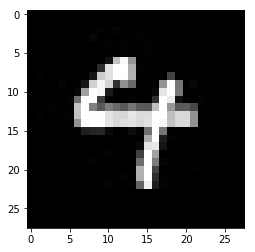

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from PIL import Image
import cv2

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
model.load_weights("drive/My Drive/Colab Notebooks/model.h5")
img = Image.open("drive/My Drive/Colab Notebooks/data/4/four100.jpg")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
# Predicting the Test set results
y_pred = model.predict(im2arr)
print('Giá trị dự đoán: ', np.argmax(y_pred))
plt.imshow(img, cmap='gray')

Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6500 samples, validate on 6500 samples
Epoch 1/10
6500/6500 [==============================] - 18s 3ms/step - loss: 0.7127 - acc: 0.7963 - val_loss: 0.1029 - val_acc: 0.9866
Epoch 2/10
6500/6500 [==============================] - 17s 3ms/step - loss: 0.0693 - acc: 0.9897 - val_loss: 0.0466 - val_acc: 0.9932
Epoch 3/10
6500/6500 [==============================] - 17s 3ms/step - loss: 0.0354 - acc: 0.9946 - val_loss: 0.0292 - val_acc: 0.9960
Epoch 4/10
6500/6500 [==============================] - 17s 3ms/step - loss: 0.0229 - acc: 0.9969 - val_loss: 0.0158 - val_acc: 0.9978
Epoch 5/10
6500/6500 [==============================] - 17s 3ms/step - loss: 0.0156 - acc: 0.9978 - val_loss: 0.0152 - val_acc: 0.9978
Epoch 6/10
6500/6500 [==============================] - 17s 3ms/step - l

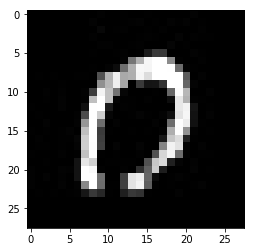

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import os
import random

homePath = 'drive/My Drive/Colab Notebooks/data/'
IMG_SIZE = 28
NUMBER_CLASS = 10
chars = [chr(i) for i in range(48,57)]
NUM_TRAIN = 6500
NUM_VAL = 7300
# ham xu li du lieu
def preprocessdata():
    data=[]
    label=[]
    for i,char in enumerate(chars):
        imgPath = homePath + char + '/'
        imgFiles = os.listdir(imgPath)
        for image in imgFiles:
            img = cv2.imread(imgPath+ image,0)
            data.append(img)
            label.append(i)
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

data,label = preprocessdata()

train_x = data[:NUM_TRAIN]
train_y = label[:NUM_TRAIN]

valid_x = data[NUM_TRAIN:NUM_VAL]
valid_y = label[NUM_TRAIN:NUM_VAL]

test_x = data[NUM_VAL:]
test_y = data[NUM_VAL:]

train_x = np.reshape(train_x,(-1,28,28,1))
train_Y = np_utils.to_categorical(train_y, 10)
valid_x = np.reshape(train_x,(-1,28,28,1))
valid_Y = np_utils.to_categorical(train_y, 10)
test_x = np.reshape(train_x,(-1,28,28,1))
test_Y = np_utils.to_categorical(train_y, 10)

print('Dữ liệu y ban đầu ',train_y[0])
print('Dữ liệu y sau one-hot encoding ',train_Y[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
H = model.fit(train_x, train_Y, validation_data=(valid_x, valid_Y),
                 batch_size=32, epochs=10, verbose=1)
score = model.evaluate(test_x, test_Y, verbose=0)
print(score)
plt.imshow(test_x[0].reshape(28,28), cmap='gray')
y_predict = model.predict(test_x[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))
model.save_weights("drive/My Drive/Colab Notebooks/model.h5")
print("Saved model to drive")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import os
import random

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
model.load_weights("C:/Users/admin/Downloads/Project II/model.h5")

image = cv2.imread("C:/Users/admin/Downloads/Project II/data/test/test_digits.jpg")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
thre = cv2.adaptiveThreshold(im_blur,maxValue=255,adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,thresholdType=cv2.THRESH_BINARY_INV,blockSize=29,C=9)
_,contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

for i in contours:
    results= [chr(char) for char in range(48, 57)]
    minsize = 20
    (x, y, w, h) = cv2.boundingRect(i)
    if w > minsize and h > minsize:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = thre[y:y + h, x:x + w]
        roi = np.pad(roi, (20, 20), 'constant', constant_values=(0, 0))
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (3, 3))
        test_x = np.array([roi,])
        number = model.predict(test_x.reshape(1,28,28,1))
        numbers = np.argmax(number,axis=-1)
        res = results[int(numbers)]
        cv2.putText(image, str(res), (x, y),cv2.FONT_HERSHEY_DUPLEX, 3, (255, 255, 0), 3)
cv2.namedWindow('im', cv2.WINDOW_NORMAL)
cv2.imwrite('C:/Users/admin/Downloads/Project II/data/result.jpg', image)
cv2.imshow('im', image)
cv2.waitKey(20000)
cv2.destroyAllWindows()


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor
